# HW2

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
df = pd.read_csv('HW1-Housing-data.csv')

In [52]:
cols = ['latitude',
        'longitude',
        'housing_median_age',
        'total_rooms',
        'total_bedrooms',
        'population',
        'households',
        'median_income',
        'median_house_value'
       ]

df_use = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])][cols]

In [53]:
print('Head\n========================\n')
display(df_use.head())

print('\nTail\n========================\n')
display(df_use.tail())

print('\nSample 5\n========================\n')
display(df_use.sample(5))

Head



,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,121.97,32,1283,194.0,485,171,6.0574,431000
830,37.61,121.99,9,3666,711.0,2341,703,4.6458,217000
859,37.57,121.97,21,4342,783.0,2172,789,4.6146,247600
860,37.58,121.96,15,3575,597.0,1777,559,5.7192,283500
861,37.58,121.98,20,4126,1031.0,2079,975,3.6832,216900



Tail



,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20635,39.48,121.09,25,1665,374.0,845,330,1.5603,78100
20636,39.49,121.21,18,697,150.0,356,114,2.5568,77100
20637,39.43,121.22,17,2254,485.0,1007,433,1.7000,92300
20638,39.43,121.32,18,1860,409.0,741,349,1.8672,84700
20639,39.37,121.24,16,2785,616.0,1387,530,2.3886,89400



Sample 5



,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10756,33.61,117.90,44,1469,312.0,507,266,3.4937,500001
5468,33.99,118.47,52,2167,622.0,1095,570,2.8514,358700
10413,33.66,117.64,6,5221,1217.0,2597,1119,4.6076,204000
7876,33.88,118.14,24,3305,982.0,2085,881,2.6641,168200
9495,39.34,123.81,17,1981,371.0,773,325,3.1563,277000


In [55]:
# original
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [54]:
# filtered 
df_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  int64  
 3   total_rooms         15687 non-null  int64  
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  int64  
 6   households          15687 non-null  int64  
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.2 MB


In [56]:
df_use.median_house_value.describe()

count     15687.000000
mean     191943.020017
std      108801.077620
min       14999.000000
25%      111300.000000
50%      166900.000000
75%      241100.000000
max      500001.000000
Name: median_house_value, dtype: float64

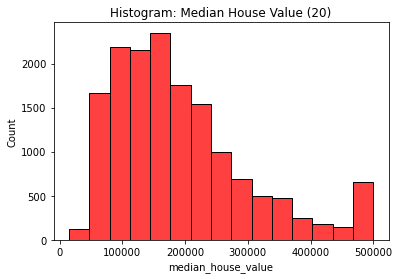

In [57]:
bins = int(0.001 * len(df_use.median_house_value))

plt.title('Histogram: Median House Value (20)')
sns.histplot(df_use.median_house_value, bins=bins, color='red');

Look at the `median_house_value` variable. Does it have a long tail?

#### Ans: I wouldn't say its particularly long, as we can observe a median centered around the ~180k mark

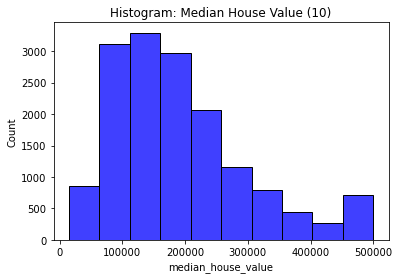

In [58]:
plt.title('Histogram: Median House Value (10)')
sns.histplot(df_use.median_house_value, bins=10, color='blue');

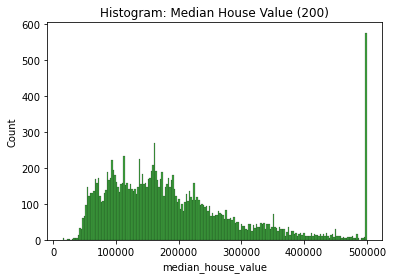

In [59]:
plt.title('Histogram: Median House Value (200)')
sns.histplot(df_use.median_house_value, bins=200, color='green');

#### Cutting the bins in have to generalize the range of the data we can see that the tail is very much minimized, however the range of the data does seem to be more pronounced as we "overfit" the bins. I would therefore say there really isn't a strong tail to this particular feature, however there does seem to be a decent spread of the data across house values especially at the high end range

In [61]:
# Missing values
# Accounts which features have NaNs in the column. Which is indicative of missing values
display(df_use.isna().any())

print('')
# Gives counts of NaNs in the data per feature
display(df_use.isna().sum())

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [64]:
# Median Value 
display(df_use.population.describe())

print('50%: {}'.format(df_use.population.describe()[5]))

print('50% via numpy: {}'.format(np.median(df_use.population)))

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

50%: 1195.0
50% via numpy: 1195.0


### Shuffle

In [131]:
np.random.seed(42)

n = df_use.shape[0] # 15687
twenty_perc = int(0.2*n)
sixty_perc = n - (2*twenty_perc)

# print(twenty_perc + sixty_perc + twenty_perc == n) # Check split == True}

In [132]:
arr = np.arange(n) # (n, )
np.random.shuffle(arr) ### shuffles in place ###

In [133]:
df_shuffled = df_use.iloc[arr] # location each index in order of shuffled 'arr'

test = df_shuffled[:twenty_perc] # 0 to 20%
val = df_shuffled[twenty_perc:2*twenty_perc] # 20 to 40%
train = df_shuffled[2*twenty_perc:] # 40 to 100% 

In [134]:
def reset_index(df):
    df.reset_index(drop=True,inplace=True)
    
for df in [train, test, val]: 
    reset_index(df)

In [135]:
train.head(3) # reset index 
# test.head(3) # reset index 

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,38.62,121.37,43,1077,199.0,447,182,3.0139,115600
1,34.13,117.66,17,3229,405.0,1289,407,6.3842,307100
2,39.00,121.00,4,170,23.0,93,27,10.9891,312500


In [136]:
### Apply Transform ### 
y_train = np.log1p(train['median_house_value'])
y_test = np.log1p(test['median_house_value'])
y_val = np.log1p(val['median_house_value'])
                   
del train['median_house_value']
del test['median_house_value']
del val['median_house_value']

### Compute Missing 

In [137]:
train['total_bedrooms'].median()

430.0

In [139]:
zero = 0 
mean = train['total_bedrooms'].mean()
median = train['total_bedrooms'].median()

def fill_df(df, feature, value):
    x = df.copy()
    x[feature].fillna(value, inplace=True)
    return x

def lr(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

# linear regression loop for computed missing values
scores = []
for value in [zero, mean, median]: 
    # compute missing
    X_train = fill_df(train, 'total_bedrooms', value)
    X_val = fill_df(val, 'total_bedrooms', value)
    
    # lin reg
    w0, w = lr(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores.append(round(score,2))

In [145]:
for score, value in zip(scores, ['zero', 'mean', 'median']): 
    print('Computed missing w/ {}\nRSME = {}\n\n'.format(value, score))

Computed missing w/ zero
RSME = 0.35


Computed missing w/ mean
RSME = 0.35


Computed missing w/ median
RSME = 0.35




In [150]:
def lr(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

scores = []
# X_train_q4 = fill_df(train, 'total_bedrooms', zero)
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = lr(X_train, y_train, r=r)
    X_val = fill_df(val,'total_bedrooms', zero)
    
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print('For r = {}, w0 = {} and RSME = {}'.format(r, w0, round(score, 2)))

For r = 0, w0 = -10.480324435026812 and RSME = 0.35
For r = 1e-06, w0 = -10.48030239663522 and RSME = 0.35
For r = 0.0001, w0 = -10.478121095534501 and RSME = 0.35
For r = 0.001, w0 = -10.458332640312065 and RSME = 0.35
For r = 0.01, w0 = -10.264481613269796 and RSME = 0.35
For r = 0.1, w0 = -8.659330009210445 and RSME = 0.35
For r = 1, w0 = -3.376308752765438 and RSME = 0.35
For r = 5, w0 = -0.9077005089931597 and RSME = 0.35
For r = 10, w0 = -0.47301493826997854 and RSME = 0.35


In [164]:
scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]: 
    np.random.seed(seed)
    
    n = df_use.shape[0] # 15687
    twenty_perc = int(0.2*n)
    sixty_perc = n - (2*twenty_perc)
    
    arr = np.arange(n) # (n, )
    np.random.shuffle(arr) ### shuffles in place ###

    df_shuffled = df_use.iloc[arr] # location each index in order of shuffled 'arr'

    test = df_shuffled[:twenty_perc] # 0 to 20%
    val = df_shuffled[twenty_perc:2*twenty_perc] # 20 to 40%
    train = df_shuffled[2*twenty_perc:] # 40 to 100% 
    
    y_train = np.log1p(train['median_house_value'])
    y_test = np.log1p(test['median_house_value'])
    y_val = np.log1p(val['median_house_value'])
    
    X_train = fill_df(train, 'total_bedrooms', zero)
    X_val = fill_df(val,'total_bedrooms', zero)
    
    del X_train['median_house_value']
    del X_val['median_house_value']
    
    w0, w = lr(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    scores.append(score)
    
    print('For seed = {}, score = {}'.format(seed, score))

For seed = 0, score = 0.33567555045571573
For seed = 1, score = 0.3370539549590208
For seed = 2, score = 0.3358111299195415
For seed = 3, score = 0.3493318326666498
For seed = 4, score = 0.32967196605372057
For seed = 5, score = 0.34242778721310774
For seed = 6, score = 0.34288926596256875
For seed = 7, score = 0.33389195014692064
For seed = 8, score = 0.3406998500539437
For seed = 9, score = 0.3379334325636343


In [165]:
np.std(scores)

0.005231004122419761

In [167]:
np.random.seed(9)

n = df_use.shape[0] # 15687
twenty_perc = int(0.2*n)
sixty_perc = n - (2*twenty_perc)
np.random.seed(42)

arr = np.arange(n) # (n, )
np.random.shuffle(arr) ### shuffles in place ###

df_shuffled = df_use.iloc[arr] # location each index in order of shuffled 'arr'

test = df_shuffled[:twenty_perc] # 0 to 20%
val = df_shuffled[twenty_perc:2*twenty_perc] # 20 to 40%
train = df_shuffled[2*twenty_perc:] # 40 to 100% 

y_train = np.log1p(train['median_house_value'])
y_test = np.log1p(test['median_house_value'])
y_val = np.log1p(val['median_house_value'])

y_train = np.log1p(train['median_house_value'])
y_test = np.log1p(test['median_house_value'])
y_val = np.log1p(val['median_house_value'])
                   
X_train = fill_df(train, 'total_bedrooms', zero)
X_val = fill_df(val,'total_bedrooms', zero)

del X_train['median_house_value']
del X_val['median_house_value']

r = 0.001

w0, w = lr(X_train, y_train, r=r)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)


In [168]:
score

0.3481052615500097